# This is a notebook which helps understand OT on signed measures

This method splits the measures to negative and positive, 


## Trivial example

In [47]:
from utils.Visualizations import *
import numpy as np

n_p = 4
n_q = 4
eps = 1.e-2
X,Y = np.linspace(0,1,n_p), np.linspace(0,1,n_q)

p = np.array([1.0,-1.0,0.0,0.0])
q = np.array([0.0,0.0,-1.0,1.0])

C = np.zeros([n_p,n_q],dtype=np.float64)

dist_f1 = lambda a,b : abs(a-b)
dist_f2 = lambda a,b : (a-b)**2
for it1 in range(n_p):
    for it2 in range(n_q):
        C[it1,it2] = dist_f1(X[it1],Y[it2])

## To work with the signed measures
p_pos, p_neg = split_signed_measure(p)
q_pos, q_neg = split_signed_measure(q)

In [48]:
K_t : np.ndarray = np.exp(C / (-eps))

### Positives

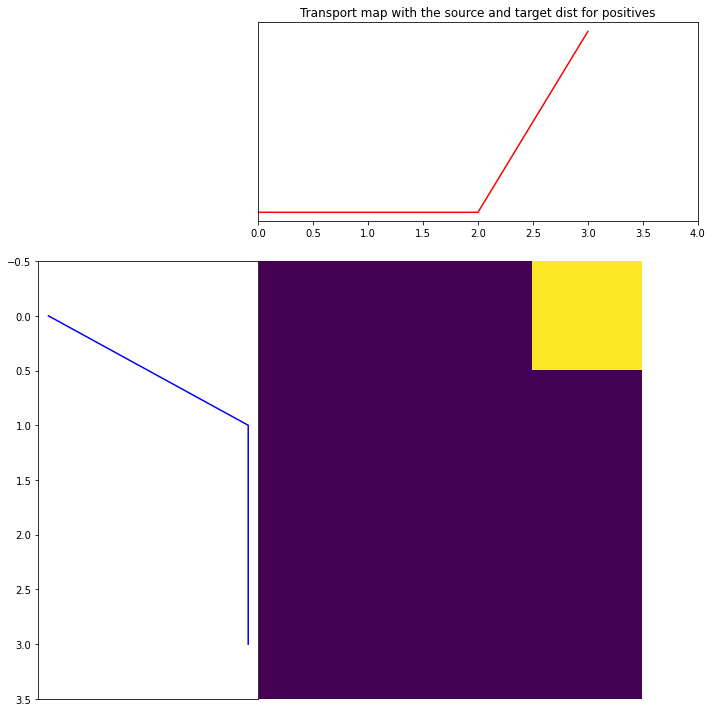

In [54]:
transport_plan_pos, transport_cost_pos = calc_transport_pot_emd(p_pos, q_pos, C)
plt.figure(figsize=(10,10))
plot1D_mat(p_pos, q_pos, T_plan_pos,'Transport map with the source and target dist for positives')
plt.show()

### Negatives

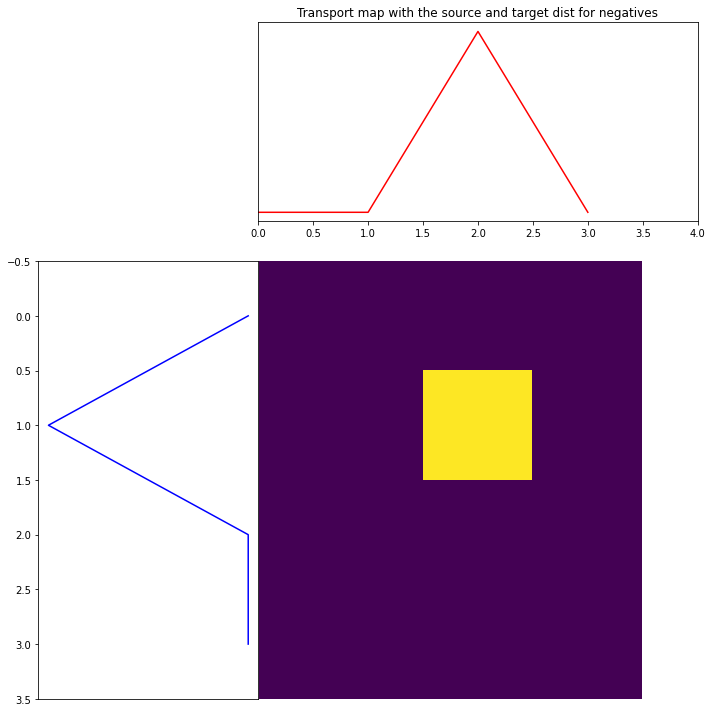

In [53]:
transport_plan_neg, transport_cost_neg = calc_transport_pot_emd(p_neg, q_neg, C)
plt.figure(figsize=(10,10))
plot1D_mat(p_neg, q_neg, T_plan_neg,'Transport map with the source and target dist for negatives')
plt.show()

### United

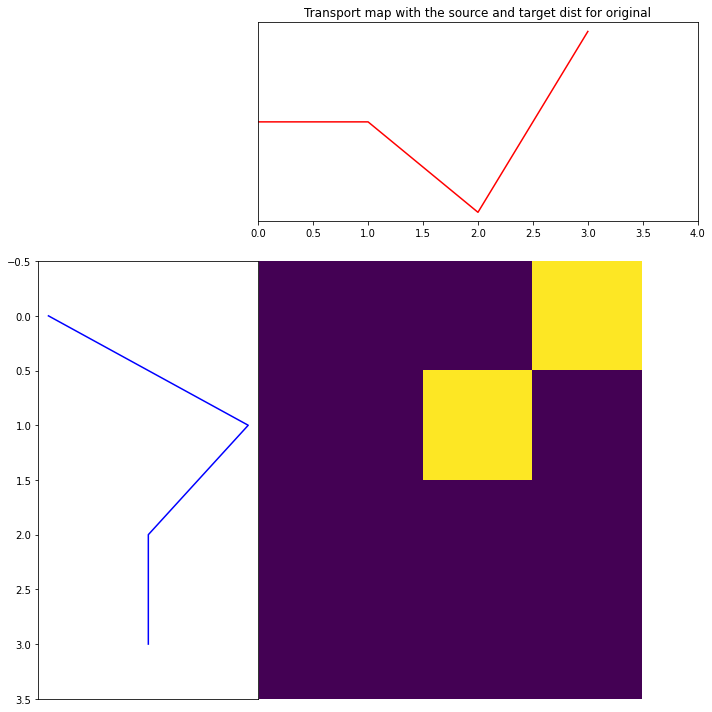

In [56]:
plt.figure(figsize=(10,10))
plot1D_mat(p, q, transport_plan_pos + transport_plan_neg,'Transport map with the source and target dist for original')
plt.show()

## Example on gaussian distributions

In [60]:
n_p = 100
n_q = 100
eps = 1.e-2
X,Y = np.linspace(0,1,n_p), np.linspace(0,1,n_q)

p = make_1D_gauss(n_p, np.floor(1 * n_p / 4.), 2.) + make_1D_gauss(n_p, np.floor(2 * n_p / 4.), 2.) * (-0.5)
q = make_1D_gauss(n_q, np.floor(5 * n_q / 8.), 2.) + make_1D_gauss(n_q, np.floor(7 * n_q / 8.), 2.) * (-0.5)

C = np.zeros([n_p,n_q],dtype=np.float64)

dist_f1 = lambda a,b : abs(a-b)
dist_f2 = lambda a,b : (a-b)**2
for it1 in range(n_p):
    for it2 in range(n_q):
        C[it1,it2] = dist_f2(X[it1],Y[it2])

## To work with the signed measures
p_pos, p_neg = split_signed_measure(p)
q_pos, q_neg = split_signed_measure(q)

In [61]:
K_t : np.ndarray = np.exp(C / (-eps))

In [62]:
transport_plan_pos, Transport_cost_pos = calc_transport_pot_emd(p_pos, q_pos, C)

### Positives

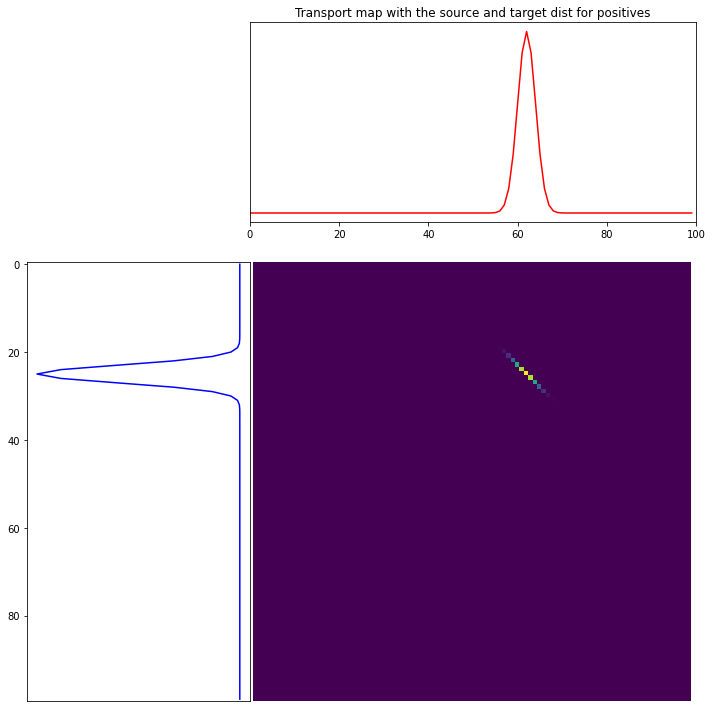

In [64]:
transport_plan_pos, transport_cost_pos = calc_transport_pot_emd(p_pos, q_pos, C)
plt.figure(figsize=(10,10))
plot1D_mat(p_pos, q_pos, transport_plan_pos,'Transport map with the source and target dist for positives')
plt.show()

### Negatives

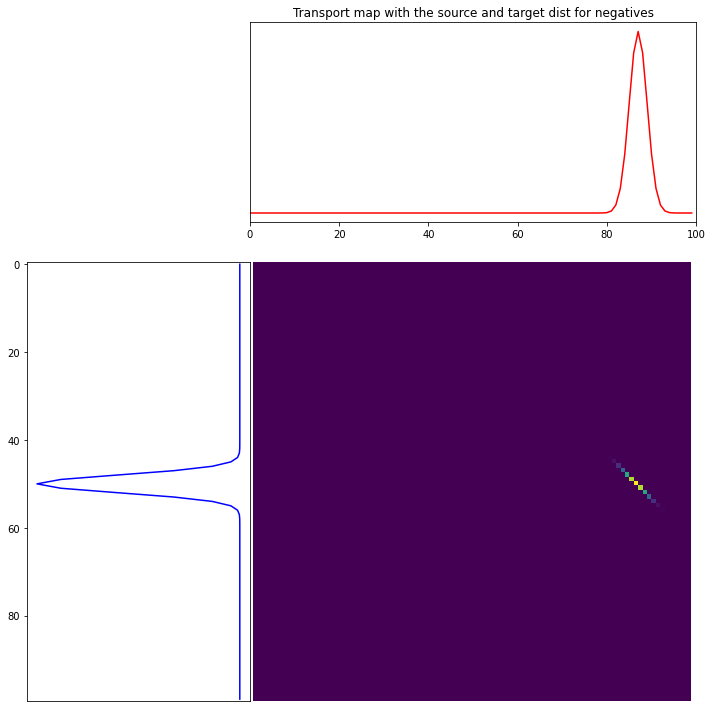

In [66]:
transport_plan_neg, transport_cost_neg = calc_transport_pot_emd(p_neg, q_neg, C)
plt.figure(figsize=(10,10))
plot1D_mat(p_neg, q_neg, transport_plan_neg,'Transport map with the source and target dist for negatives')
plt.show()

### United

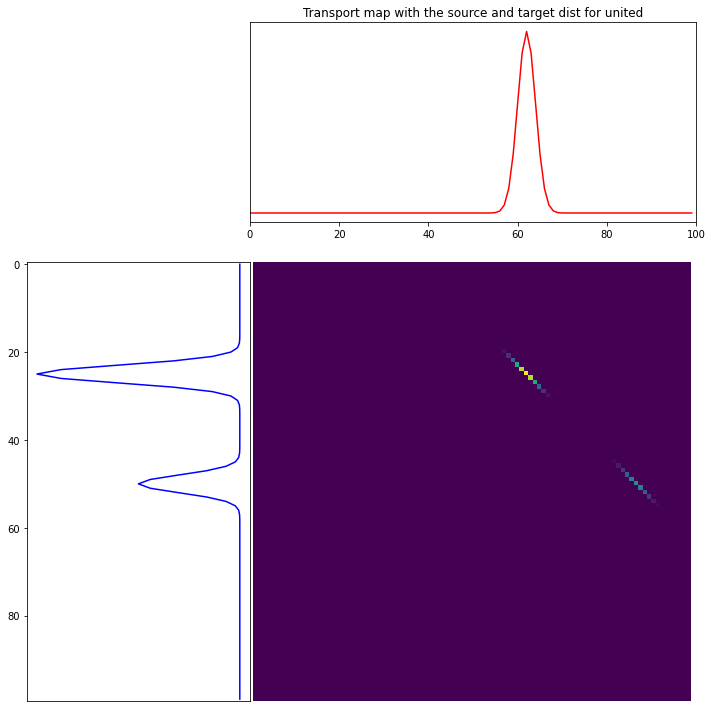

In [91]:
plt.figure(figsize=(10,10))
plot1D_mat(p, q, transport_plan_pos + transport_plan_neg,'Transport map with the source and target dist for united')
plt.show()

### Trying to define 
\begin{equation}
\mu = \mu_{+} - \mu_{-}
\quad \text{and} \quad 
\nu = \nu_{+} - \nu_{-}\, ,
\end{equation}

where $\mu_{+},\mu_{-} \in \mathbb{R}^{I}_{+}$ , $\nu_{+},\nu_{-} \in \mathbb{R}^{J}_{+}$ , $\{\text{supp}\{\mu_{+}\} \cap \text{supp}\{\mu_{-}\}\} = \{ \emptyset \}$ and $\{\text{supp}\{\nu_{+}\} \cap \text{supp}\{\nu_{-}\}\} = \{ \emptyset \}$.

The RGWD for signed measures will be defined as follows:

\begin{equation}
\tag{$W$}
\mathbb{W}_{1}^{\lambda, \epsilon}(\mu,\nu) = W_{1}^{\lambda, \epsilon}(\mu_{+} + \nu_{-} , \mu_{-} + \nu_{+}) \, .
\end{equation}

### Instead of the defined wasserstein distance in the article, I will use the transport plans I got here, for visualization

In [89]:
p_new = p_pos + q_neg
q_new = q_pos + p_neg

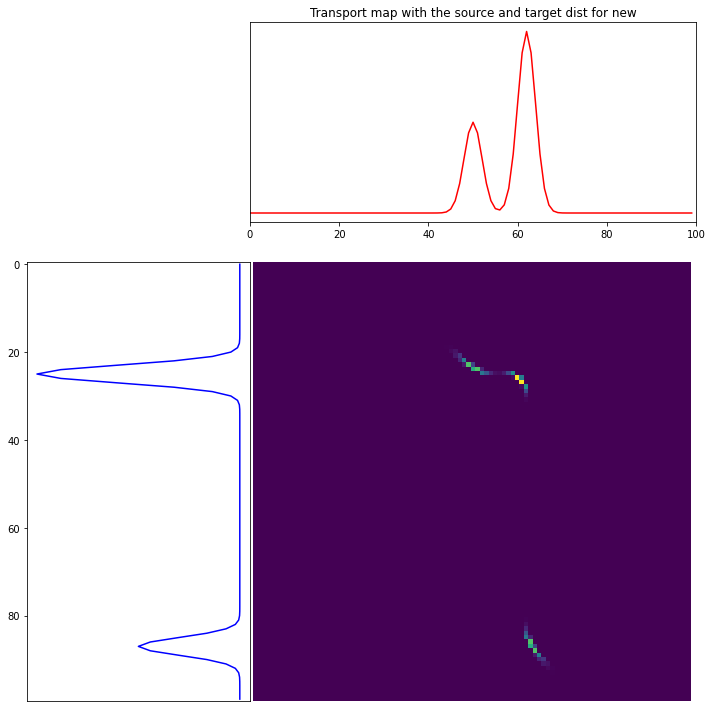

In [90]:
transport_plan_new, transport_cost_new = calc_transport_pot_emd(p_new, q_new, C)
plt.figure(figsize=(10,10))
plot1D_mat(p_new, q_new, transport_plan_new,'Transport map with the source and target dist for new')
plt.show()

We see a very big difference between the plans and I'm not sure we should be. This does not seem like the optimal way to perform this calculation. Think about how we could test whether these are legit.

## UNBALANCED

In [81]:
n_p = 100
n_q = 100
X,Y = np.linspace(0,1,n_p), np.linspace(0,1,n_q)

p = make_1D_gauss(n_p, np.floor(1 * n_p / 4.), 2.) + make_1D_gauss(n_p, np.floor(2 * n_p / 4.), 2.) * (0.5)
q = make_1D_gauss(n_q, np.floor(5 * n_q / 8.), 2.)

C = np.zeros([n_p,n_q],dtype=np.float64)

dist_f1 = lambda a,b : abs(a-b)
dist_f2 = lambda a,b : (a-b)**2
for it1 in range(n_p):
    for it2 in range(n_q):
        C[it1,it2] = dist_f2(X[it1],Y[it2])

### eps = 1e-3

c:\users\eriki\appdata\local\programs\python\python38\lib\site-packages\ot\bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


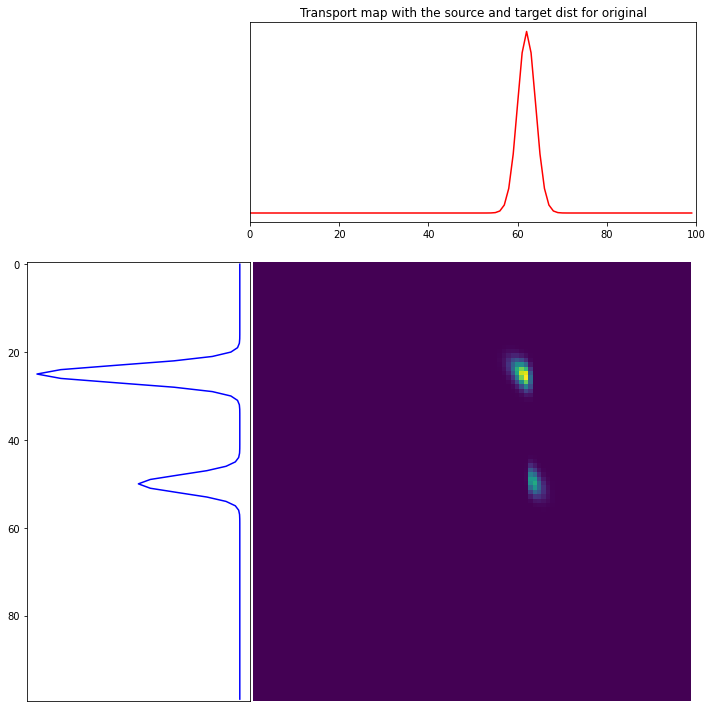

In [83]:
eps = 1.e-3
transport_plan, transport_cost, _, _ = calc_transport_pot_sinkhorn(p, q, C, eps)
plt.figure(figsize=(10,10))
plot1D_mat(p, q, transport_plan,'Transport map with the source and target dist for original')
plt.show()

### eps = 1e-4

c:\users\eriki\appdata\local\programs\python\python38\lib\site-packages\ot\bregman.py:485: RuntimeWarning: divide by zero encountered in divide
  u = 1. / nx.dot(Kp, v)
c:\users\eriki\appdata\local\programs\python\python38\lib\site-packages\ot\bregman.py:485: RuntimeWarning: overflow encountered in divide
  u = 1. / nx.dot(Kp, v)
c:\users\eriki\appdata\local\programs\python\python38\lib\site-packages\ot\bregman.py:492: UserWarning: Warning: numerical errors at iteration 2
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


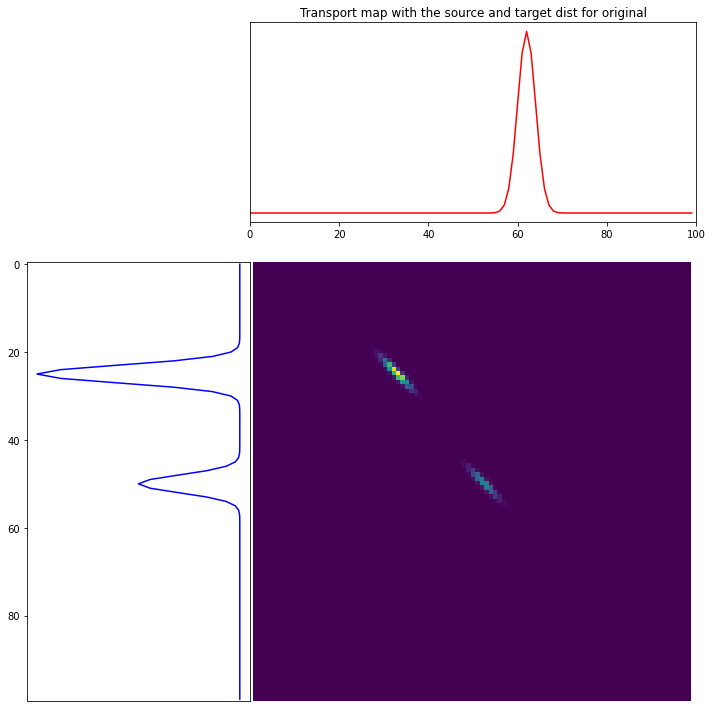

In [84]:
eps = 1.e-4
transport_plan, transport_cost, _, _ = calc_transport_pot_sinkhorn(p, q, C, eps)
plt.figure(figsize=(10,10))
plot1D_mat(p, q, transport_plan,'Transport map with the source and target dist for original')
plt.show()

## My implementation of sinkhorn according to https://arxiv.org/pdf/2211.08775.pdf

### eps = 1e-2

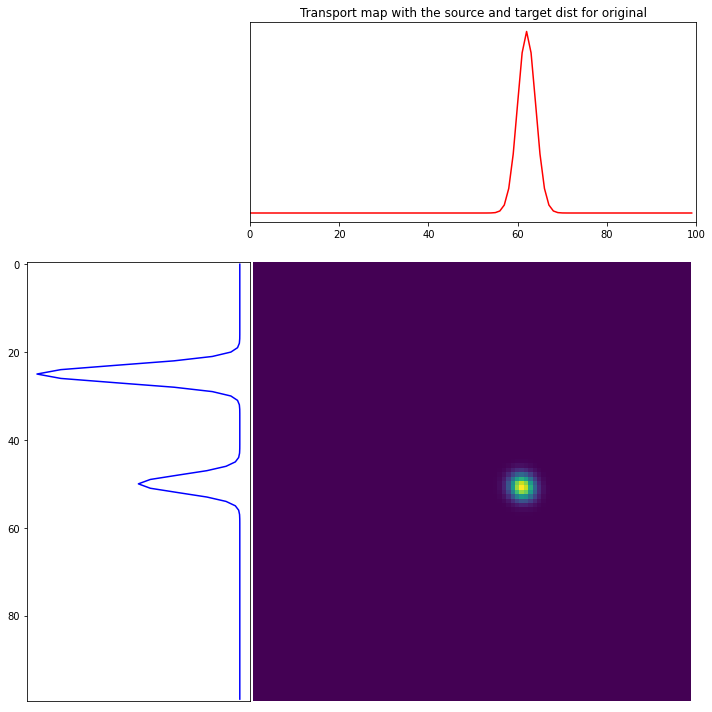

In [86]:
eps = 1.e-2
_, _, transport_plan = unbalanced_sinkhorn(p, q, C, eps, return_plan=True)
plt.figure(figsize=(10,10))
plot1D_mat(p, q, transport_plan,'Transport map with the source and target dist for original')
plt.show()

### eps = 1e-4

C:\Users\eriki\Documents\school\Thesis\Optimal_transport_playground\utils\utils.py:522: RuntimeWarning: overflow encountered in exp
  else:


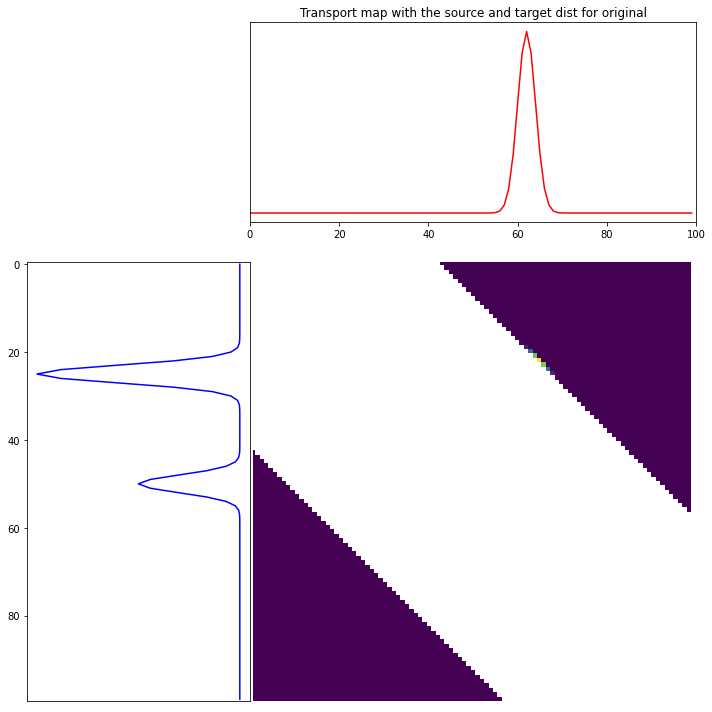

In [87]:
eps = 1.e-4
_, _, transport_plan = unbalanced_sinkhorn(p, q, C, eps, return_plan=True)
plt.figure(figsize=(10,10))
plot1D_mat(p, q, transport_plan,'Transport map with the source and target dist for original')
plt.show()

We can see that we simply got a diagonal line for epsilon which is too small, this happens because having a small epsilon makes us "divide by zero" and therefore get the trivial solution which is a constant diagonal vector.